<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="250" height="250"><br>
</center>


 - (https://bit.ly/hg-01-3)

# Chapter 02 데이터 다루기 (수상한 생선을 조심하라!)


- 학습목표
    - 머신러닝 알고리즘에 주입할 데이터를 준비하는 방법을 배운다.
    - 데이터 형태가 알고리즘에 미치는 영향을 이해한다.

### 02-1 훈련 세트와 테스트 세트
  
- 핵심키워드
    - 지도학습, 비지도 학습, 훈련세트, 테스트 세트
    - 지도 학습과 비지도 학습의 차이를 배운다. 모델을 훈련시키는 훈련 세트와 모델 평가하기 위한 테스트 세트로 데이터를 나눠서 학습해본다.
    
#### 지도 학습과 비지도 학습

머신러닝 알고리즘은 크게 **지도 학습 supervised learning**과 **비지도 학습 unsupervised learning** 으로 나눌 수 있다. 지도 학습 알고리즘은 훈련하기 위한 데이터와 정답이 필요하다. '마켓과 러닝머신'에서 보았던 도미와 빙어의 예를 보면 생선의 길이와 무게를 알고리즘에 사용했습니다. 이 경우 정답은 도미인지 아닌지 여부입니다. 지도 학습에서는 데이터와 정답을 **입력 input**과 **타깃 target**이라고 하고, 이 둘을 합쳐 **훈련 데이터 training data**라고 부른다. 그리고 앞서 언급했듯이 입력으로 사용된 길이와 무게를 **특성 feature**이라고 한다. 도미와 빙어를 구분하는 데 사용한 길이와 무게가 특성이다. 앞으로 입력,타깃,특성,훈련 데이터와 같은 용어가 자주 등장하니 잘 기억하자. 지도 학습은 정답(타깃)이 있으니 알고리즘이 정답을 맞히는 것을 학습한다. 예를 들어 도미인지 빙어인지 구분하는 거다. 반면 비지도 학습 알고리즘은 타깃 없이 입력 데이터만 사용한다. 이런 종류의 알고리즘은 정답을 사용하지 않으므로 무언가를 맞힐 수가 없다. 대신 데이터를 잘 파악하거나 변형하는 데 도움을 준다. 1장에서 도미와 빙어를 구분하기 위해 사용한 k-최근접 이웃 알고리즘은 입력 데이터와 타깃(정답)을 사용했으므로 당연히 지도 학습 알고리즘이다. 이 알고리즘을 훈련하여 생선이 도미인지 아닌지를 판별하고, 이 모델이 훈련 데이터에서 도미를 100% 완벽하게 판별했다. 모든 것이 잘 된것 같은데 무엇이 문제일까?

#### 훈련세트와 테스트세트

중간고사를 보기 전에 출제될 시험 문제와 정답을 미리 알려주고 시험을 본다면 어떨까? 시험문제와 정답만 외우면 100점을 맞을 것이다. 머신러닝도 이와 마찬가지이다. 도미와 빙어의 데이터와 타깃을 주고 훈련한 다음, 같은 데이터로 테스트한다면 모두 맞히는 것이 당연하다. 연습 문제와 시험문제가 달라야 올바르게 학생의 능력을 평가할 수 있듯이 머신러닝 알고리즘의 성능을 제대로 평가하려면 훈련 데이터와 평가에 사용할 데이터가 각각 달라야 한다. 이렇게 하는 가장 간단한 방법은 평가를 위해 또 다른 데이터를 준비하거나 이미 준비된 데이터 중에서 일부를 떼어 내어 활용하는 것이다. 일반적으로 후자의 경우가 많다. 평가에 사용하는 데이터를 **테스트 세트 test set** , 훈련에 사용되는 데이터를 **훈련세트 train set**라고 부른다. 정리해보면 훈련에 사용한 데이터로 모델을 평가하는 것은 적절하지 않다. 훈련할 때 사용하지 않은 데이터로 평가해야한다. 이를 위해 훈련 데이터에서 일부를 떼어 내어 테스트 세트로 사용하겠다.

- 먼저 1장에서 처럼 도미와 빙어의 데이터를 합쳐 하나의 파이썬 리스트로 준비한다. http://bit.ly/bream_smelt
    

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

- 이제 두 파이썬 리스트를 순회하면서 각 생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트를 만들자.

In [2]:
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

이때 하나의 생선 데이터를 **샘플 sample** 이라고 부른다. 도미와 빙어는 각각35마리, 14마리가 있으므로 전체 데이터는 49개의 샘플이 있다.사용하는 특성은 길이와 무게 2개이다. 이 데이터의 처음 35개를 훈련세트로, 나머지 14개를 테스트 세트로 사용하겠다.

- 먼저 사이킷런의 KNeighborsClassifier 클래스를 임포트하고 모델 객체를 만든다.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

이제 전체 데이터에서 처음 35개를 선택해야 한다. 일반적으로 리스트처럼 배열의 요소를 선택할 때는 배열의 위치, 즉 **인덱스 index**를 지정한다. 예를 들어 fish_data의 다섯 번째 샘플을 출력하기 위해 다음과 같이 쓸 수 있다.

In [4]:
print(fish_data[4])

[29.0, 430.0]


파이썬 리스트는 인덱스 외에도 **슬라이싱**이라는 특별한 연산자를 제공한다. 슬라이싱은 콜론(:)을 가운데 두고 인덱스의 범위를 지정하여 여러 개의 원소를 선택할 수 있다. 예를 들어 첫 번째부터 다섯 번째까지의 샘플을 선택해보자.

In [5]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


배열의 인덱스는 0부터 시작한다. 

리스트의 리스트로 5개의 샘플이 선택되었다. 슬라이싱을 사용할 때는 **마지막 인덱스의 원소는 포함되지 않는다**는 점을 주의해야 한다. 예를 들어 '0:5'와 같이 지정했다면 0~4까지의 5개 원소만 선택되고 인덱스 5인 여섯 번째 원소는 선택되지 않는다. 만약 '0:5'와 같이 처음부터 시작되는 슬라이싱의 경우 0을 생략하고 쓸 수 있다.

In [6]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


- [  ]안에 0 생략해도 같게 나옴.

이와 비슷하게 마지막 원소까지 포함할 경우 두 번째 인덱스를 생략할 수 있다. 예를 들어 마지막에서 5개의 샘플을 출력할 때 '44:49'와 같이 쓰지 않고 '44:'만 써도 된다.

In [7]:
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [8]:
print(fish_data[44:49])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


이를 응용하면 생선 데이터에서 처음 35개와 나머지 14개를 선택하는 것을 간단하게 처리 할 수 있다.

In [9]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용

train_input = fish_data[:35]

# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용

train_target = fish_target[:35]

# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용

test_input = fish_data[35:]

# 테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용

test_target = fish_target[35:]

슬라이싱 연산으로 인덱스 0~34까지 처음 35개 샘플을 훈련 세트로 선택했고, 인덱스 35~48까지 나머지 14개 샘플을 테스트 세트로 선택했다. 데이터를 준비했으니 훈련 세트로 fit() 메서드를 호출해 모델을 훈련하고, 테스트 세트로 score() 메서드를 호출해 평가해 보자.

In [10]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

- ??!?! 정확도가 0.0이다. 머신러닝 모델이 최악의 성능을 내고 있다. 무엇이 문제일까?

### 샘플링 편향

마지막 14개를 테스트 세트로 떼어 놓으면 훈려 세트에는 빙어가 하나도 들어 있지 않다. 빙어 없이 모델을 훈련하면 빙어를 올바르게 분류할 수가 없다.
- 훈련 세트와 테스트 세트를 나누려면 도미와 빙어가 골고루 섞이게 만들어야 한다.

fish_data에는 처음부터 순서대로 35개의 도미와 14개의 빙어 샘플이 들어가 있다. 따라서 마지막 14개를 테스트 세트로 만들면 빙어 데이터만 들어간다. 상식적으로 훈련하는 데이터와 테스트하는 데이터에는 도미와 빙어가 골고루 섞여 있어야 한다. 일반적으로 훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않으면 샘플링이 한쪽으로 치우졌다는 의미로 **샘플링 편향**이라고 부른다. 이 예에서는 훈련 세트에 도미만 있기 때문에 테스트 세트가 무엇이든 무조건 도미라고 분류한다. 그런데 테스트 세트는 빙어만 있기 때문에 정답을 하나도 맞히지 못한다.

- 훈련 세트와 테스트 세트를 나누기 전에 데이터를 섞든지 아니면 골고루 샘플을 뽑아서 훈련세트와 테스트 세트를 만들어야 한다. 
- 이런 작업을 간편하게 처리할 수 있도록 새로운 파이썬 라이브러리인 넘파이에 대해 알아보자.

### 넘파이

**넘파이 numpy**는 파이썬의 대표적인 배열array 라이브러리이다. 앞서 파이썬의 리스트로 2차원 리스트를 표현할 수 있지만 고차원 리스트를 표현하려면 매우 번거롭다. 넘파이는 고차원의 배열을 손쉽게 만들고 조작할 수 있는 간편한 도구를 많이 제공한다.
- 차원(dimension)이란 말은 조금씩 다른 의미로 쓰일 수 있다. 배열에서 차원은 좌표계의 축과 같다.
- 1차원 배열은 선이고, 2차원 배열은 면, 3차원 배열은 3차원 공간을 나타낸다. 차원을 축으로 표시하면 다음과 같다.
보통의 xy좌표계와는 달리 시작점이 왼쪽 아래가 아니고 왼쪽 위에서부터 시작한다. 배열의 시작점을 이렇게 놓으면 편리한 점이 많다.그럼 생선 데이터를 2차원 넘파이 배열로 변환해 보자.

In [11]:
import numpy as np

파이썬 리스트를 넘파이 배열로 바꾸기는 정말 쉽다. 넘파이 array() 함수에 파이썬 리스트를 전달하면 끝이다. 
- 2차원 넘파이 배열로 변환해 보자

In [14]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

이제 input_arr 배열을 출력해 보자.

In [15]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


기대했던 것과 동일한 형태로 출력된다. 넘파이는 친절하게 배열의 차원을 구분하기 쉽도록 행과 열을 가지런히 출력한다. 출력 결과에서 49개의 행과 2개의 열을 쉽게 확인할 수 있다. 눈으로 확인하는 것 외에도 넘파이 배열 객체는 배열의 크기를 알려주는 shape 속성을 제공한다. 이미 우리는 49개의 샘플과 2개의 특성이 있는 것을 안다. 다음 명령으로 확인해 보자.

In [17]:
print(input_arr.shape)

(49, 2)


이제 생선 데이터를 넘파이 배열로 준비했으므로 이 배열에서 랜덤하게 샘플을 선택해 훈련 세트와 테스트 세트로 만들 차례이다. 여기에서는 배열을 섞은 후에 나누는 방식 대신에 무작위로 샘플을 고르는 방법을 사용하겠다. 한 가지 주의할 점은 input_arr와 target_arr에서 같은 위치는 함께 선택되어야 한다는 점이다. 예를 들어 input_arr의 두 번째 값은 훈련 세트로 가고, target_arr의 두 번째 값은 테스트 세트로 가면 안된다. 타깃이 샘플과 함께 이동하지 않으면 올바르게 훈련 될 수 없다. 
- 이렇게 하려면 훈련 세트와 테스트 세트로 나눌 인덱스값을 잘 기억해야한다. 항상 인덱스값을 기억할 수는 없으니 다른 방법이 필요하다. 아예 인덱스를 섞은 다음 input_arr와 target_arr에서 샘플을 선택하면 무작위로 훈련 세트를 나누는 셈이 된다.
넘파이 arange() 함수를 사용하면 0에서부터 48까지 1씩 증가하는 인덱스를 간단히 만들 수 있다. 그 다음 이 인덱스를 랜덤하게 섞는다.
- 넘파이에서 무작 결과를 만드는 함수들은 실행할 때마다 다른 결과를 만든다. 일정한 결과를 얻으려면 초기에 랜덤시드(random seed)를 지정하면 된다. 책과 동일한 실습 결과를 얻을 수 있도록 랜덤 시드를 42로 지정했다.

In [18]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

넘파이 arange() 함수에 정수 N을 전달하면 0에서부터 N-1 까지 1씩 증가하는 배열을 만든다. 넘파이 random 패키지 아래에 있는 shuffle()함수는 주어진 배열을 무작위로 섞는다. 만들어진 인덱스를 출력해 보자.

In [19]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


0부터 48까지 정수가 잘 섞였다. 이제 랜덤하게 섞인 인덱스를 사용해 전체 데이터를 훈련 세트와 테스트 세트로 나누어 보자. 넘파이는 슬라이싱 외에 **배열 인덱싱(array indexing)** 이란 기능을 제공한다. 배열 인덱싱은 1개의 인덱스가 아닌 여러 개의 인덱스로 한 번에 여러 개의 원소를 선택할 수 있다. 예를 들면 다음 처럼 input_arr에서 두 번째와 네 번째 샘플을 선택하여 출력할 수 있다.

In [20]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


비슷한 방식으로 리스트 대신 넘파이 배열을 인덱스로 전달할 수도 있다. 앞서 만든 index 배열의 처음 35개를 input_arr와 target_arr에 전달하여 랜덤하게 35개의 샘플을 훈련세트로 만들겠다.

In [21]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

만들어진 index의 첫 번째 값은 13이다. 따라서 train_input의 첫 번째 원소는 input_arr의 열네 번째 원소가 들어 있을 것이다.

In [22]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


정확하게 일치한다. 이번에는 나머지 14개를 테스트 세트로 만들어 보겠다.

In [23]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

이제 모든 데이터가 준비 되었다. 훈련 세트와 테스트 세트에 도미와 빙어가 잘 섞여 있는지 산점도를 그려보자.

- 2차원 배열은 행과 열 인덱스를 콤마(,)로 나누어 지정한다. 슬라이싱 연산자로 처음부터 마지막 원소까지 모두 선택하는 경우 시작과 종료 인덱스를 모두 생략할 수 있다.

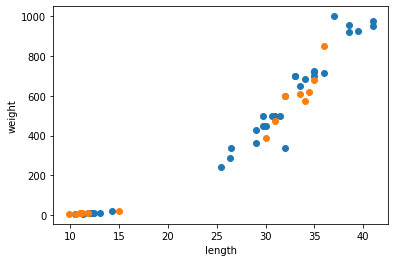

In [28]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

파란색이 훈련세트이고 주황색이 테스트 세트 이다. 양쪽에 도미와 빙어가 모두 섞여 있다 의도한 대로 만들어진 것 같다. 이제 모델을 다시 훈련시켜보자.

### 두 번째 머신러닝 프로그램

앞서 만든 훈련 세트와 테스트 세트로 k-최근접 이웃 모델을 훈련시켜보자.fit() 메서드를 실행 할 때마다 KNeighborsClassifier 클래스의 객체는 이전에 학습한 모든 것을 잃어버린다.이전 모델을 그대로 두고 싶다면 KNeighborsClassifier 클래스 객체를 새로 만들어야 한다. 여기에서는 단순하게 이전에 만든 kn객체를 그대로 사용하겠다.

In [29]:
kn = kn.fit(train_input, train_target)

인덱스를 섞어 만든 train_input 과 train_target으로 모델을 훈련시켰다. 다음은 test_input과 test_target으로 이 모델을 테스트할 차례이다.

In [30]:
kn.score(test_input, test_target)

1.0

100%의 정확도로 테스트 세트에 있는 모든 생선을 맞혔다. predict() 메서드로 테스트 세트의 예측결과와 실제 타깃을 확인해 보자.

In [31]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [32]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

테스트 세트에 대한 예측 결과가 정답과 일치한다. 아주 좋다. predict() 메서드의 출력 결과가 test_target의 출력과 동일하게 array()로 감싸 있는 것을 눈여겨 보자. 이 값은 넘파이 배열을 의미한다. 즉 predict() 메서드가 반환하는 값은 단순한 파이썬 리스트가 아니라 넘파이 배열이다. 사실 사이킷런 모델의 입력과 출력은 모두 넘파이 배열이다. 넘파이는 많은 파이썬 과학 라이브러리에서 사용하는 표준 데이터이다. 이번엔 모델을 훈련할 때 들어 있지 않은 샘플로 테스트 했기 때문에 올바르게 평가했다.  

### 훈련 모델 평가 - 문제해결 과정

알고리즘이 도미와 빙어를 모두 외우고 있다면 같은 데이터로 모델을 평가하는 것은 이상하다. 모델을 훈련할 때 사용한 데이터로 모델의 성능을 평가하는 것은 정답을 미리 알려주고 시험을 보는 것과 같다. 공정하게 점수를 매기기 위해서는 훈련에 참여하지 않은 샘프을 사용해야한다. 이 때문에 훈련 데이터를 훈련 세트와 테스트 세트로 나누었다. 훈련 세트로는 모델을 훈련하고 테스트 세트로 모델을 평가했다. 하지만 테스트 세트를 그냥 무작정 나누어서는 안된다. 도미와 빙어를 분류하는 것이 목적이기 때문에 훈련 세트나 테스트 세트에 어느 한 생선만 들어가 있다면 올바른 학습이 이루어지지 않는다. 도미와 빙어를 골고루 섞어 나누기 위해 파이썬의 다차원 배열 라이브러리인 넘파이를 사용해 보았다. 넘파이는 파이썬의 리스트와 비슷하지만 고차원의 큰 배열을 효과적으로 다룰 수 있고 다양한 도구를 많이 제공한다. 이 절에서는 넘파이의 shuffle() 함수를 사용해 배열의 인덱스를 섞었다. 결과는 대성공이다. 테스트 세트에서 100%의 정확도를 달성 했다.

#### 전체 소스 코드
- https://bit.ly/hg-02-1 에 접속하면 이 절의 코드를 바로 열어 볼 수 있다.

[29.0, 430.0]
[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]
[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]
[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2

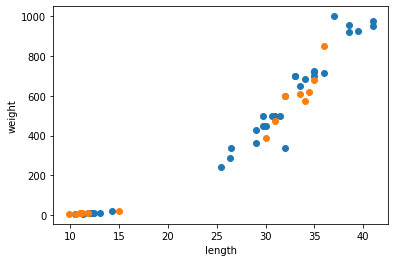

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [33]:
## 훈련 세트와 테스트 세트

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

print(fish_data[4])

print(fish_data[0:5])

print(fish_data[:5])

print(fish_data[44:])

train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

## 넘파이

import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)

print(input_arr.shape)

np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

print(index)

print(input_arr[[1,3]])

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(input_arr[13], train_input[0])

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 두 번째 머신러닝 프로그램

kn = kn.fit(train_input, train_target)

kn.score(test_input, test_target)

kn.predict(test_input)

test_target

- 출처: 혼자 공부하는 머신러닝 + 딥러닝

## 02-2 데이터 전처리

- 핵심 키워드
    - 데이터 전처리, 표준 점수, 브로드 캐스팅
    - 올바른 결과 도출을 위해서 데이터를 사용하기 전에 데이터 전처리 과정을 거친다. 전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고 표준점수로 특성의 스케일을 변환하는 방법을 배운다.

### 넘파이로 데이터 준비하기

먼저 도미와 빙어 데이터를 준비한다. 이번에는 조금 더 세련된 방법을 사용해보자. 다음 처럼 생선 데이터를 준비하자.
- http://bit.ly/bream_smelt 에서 복사해서 쓰자.

In [34]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

전에는 이 파이썬 리스트를 순회하면서 원소를 하나씩 꺼내 생선 하나의 길이와 무게를 리스트 안의 리스트로 직접 구성했다. 하지만 이제 넘파이를 배웠으니 훨씬 간편하게 만들 수 있다. 우선 넘파이를 임포트 한다.

In [35]:
import numpy as np

넘파이의 column_stack() 함수는 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결한다. 예를 들면 다음과 같은 간단한 2개의 리스트를 나란히 붙여 보자. 연결할 리스트는 파이썬 튜플 tuple 로 전달한다.

In [39]:
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

- 튜플 tuple 이란?
    - 파이썬 튜플은 리스트와 매우 비슷하다. 리스트처럼 원소에 순서가 있지만 한 번 만들어진 튜플은 수정할 수 없다. 튜플을 사용하면 함수로 전달한 값이 바뀌지 않는다는 것을 믿을 수 있기 때문에 매개변수 값으로 많이 사용한다.
    
[1,2,3] 과 [4,5,6] 두 리스트를 일렬로 세운 다음 나란히 옆으로 붙였다. 만들어진 배열은 (3,2) 크기의 배열이다. 즉 3개의 행이 있고 2개의 열이 있다. 그럼 이제 fish_length와 fish_weight를 합치자. 방법을 동일하다.

In [40]:
fish_data = np.column_stack((fish_length, fish_weight))

두 리스트가 잘 연결되었는지 처음 5개의 데이터를 확인해 보자.

In [41]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


기대했던 대로 잘 연결되었다. 눈치챘을지 모르지만, 넘파이 배열을 출력하면 리스트처럼 한 줄로 길게 출력되지 않고 행과 열을 맞추어 가지런히 정리된 모습으로 보여준다. 결과만 봐도 5개의 행을 출력했고 행마다 2개의 열(생선의 길이와 무게)이 있다는 것을 쉽게 알 수 있다. 동일한 방법으로 타깃 데이터도 만들어 보자. 이전 절에서는 원소가 하나인 리스트 [1],[0]을 여러 번 곱해서 타깃 데이터를 만들었다. 하지만 넘파이에는 더 나은 방법이 있다. 바로 np.ones()와 np.zeros() 함수이다. 이 두함수는 각각 원하는 개수의 1과 0을 채운 배열을 만들어 준다. 예를 들면 다음과 같다.

In [42]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


이 두 함수를 사용해 1이 35개인 배열과 0이 14개인 배열을 간단히 만들 수 있다. 그 다음 두 배열을 그대로 연결하면 된다. 여기에서는 np.column_stack() 함수를 사용하지 않고 첫 번째 차원을 따라 배열을 연결하는 np.concatenate() 함수를 사용한다. 그럼 np.concatenate()함수를 사용해 타깃 데이터를 만들어 보자. np.column_stack()과 마찬가지로 연결한 리스트나 배열을 튜플로 전달해야 한다.

In [43]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

이제 데이터가 잘 만들었는지 확인해 보자.

In [44]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


앞에서 사용한 데이터와 같은 데이터를 준비했다. 이번에는 파이썬 리스트를 사용해 수동으로 만들지 않고 넘파이 함수를 사용했다. 이 예제는 데이터가 작기 때문에 큰 차이가 없지만 데이터가 아주 큰 경우에 파이썬 리스트로 작업하는 것은 비효율적이다. 넘파이 배열은 핵심 부분이 C, C++과 같은 저수준 언어로 개발되어서 빠르고, 데이터 과학 분야에 알맞게 최적화되어 있다. 이제 다음 차례는 훈련 세트와 테스트 세트를 나눌 차례이다.

### 사이킷런으로 훈련 세트와 테스트 세트 나누기

앞에서는 넘파이 배열의 인덱스를 직접 섞어서 훈련 세트와 테스트 세트로 나누었다. 사실 이 방법은 조금 번거롭다. 이번에는 좀 더 세련된 방법을 사용해 보겠다. 사이킷런은 머신러닝 모델을 위한 알고리즘뿐만 아니라 다양한 유틸리티 도구도 제공한다. 대표적인 도구가 바로 지금 사용할 train_test_split() 함수이다. 이 함수는 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나누어 준다. 물론 나누기 전에 알아서 섞어 준다. train_test_split()함수는 사이킷런의 model_selection 모듈 아래 있으며 다음과 같이 임포트한다.

In [45]:
from sklearn.model_selection import train_test_split

사용법은 아주 간단하다. 나누가 싶은 리스트나 배열을 원하는 만큼 전달하면 된다. 이 예제에서는 fish_data 와 fish_target을 나눈다. 1절 '훈련 세트와 테스트 세트'에서 데이터를 무작위로 섞기 전에 np.random.seed() 함수를 사용해 여러분의 출력 결과와 책의 내용이 같아지도록 만들었다. 순전히 교육적인 목적이었다. train_test_split() 함수에는 친절하게도 자체적으로 랜덤 시드를 지정할 수 있는 random_state 매개변수가 있다. 다음과 같이 훈련 세트와 테스트 세트를 나누자.

In [48]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

fish_data와 fisg_target 2개의 배열을 전달했으므로 2개씩 나뉘어 총 4개의 배열이 반환된다. 차례대로 처음 2개는 입력 데이터 (train_input, test_input), 나머지 2개는 타깃 데이터(train_target, test_target)이다. 랜덤 시드 (random_state)는 42로 지정했다. 이 함수는 기본적으로 25%를 테스트 세트로 떼어낸다. 잘 나누었는지 넘파이 배열의 shape 속성으로 입력 데이터의 크기를 출력해 보자.

In [49]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [50]:
print(train_target.shape, test_target.shape)

(36,) (13,)


훈련 데이트와 테스트 데이터를 각각 36개와 13개로 나누었다. 입력 데이터는 2개의 열이 있는 2차원 배열이고 타깃 데이터는 1차원 배열이다.
- 넘파이 배열의 크기는 파이썬의 튜플로 표현된다.튜플의 원소가 하나면 원소 뒤에 콤마를 추가한다. 이 예에서 타깃 데이터는 1차원 배일이므로 원소가 하나인 튜플로 표현되었다. 도미와 빙어가 잘 섞였는지 테스트 데이터를 출력해 보자.

In [51]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


13개의 테스트 세트 중에 10개가 도미(1)이고, 3개가 빙어(0)이다. 잘 섞인 것 같지만 빙어의 비율이 조금 모자른다. 원래 도미와 빙어의 개수가 35개와 14개이므로 두 생선의 비율은 2.5:1이다. 하지만 이 테스트 세트의 도미와 빙어의 비율은 3.3:1이다. 이전 절에서 본 샘플링 편향이 여기에서도 조금 나타났다. 이전 절에서 본 샘플링 편향이 여기에서도 조금 나타났다. 이처럼 무작위로 데이터를 나누었을 때 샘플이 골고루 섞이지 않을 수 있다. 특히 일부 클래스의 개수가 적을 때 이런일이 생길 수 있다. 훈련세트와 테스트 세트에 샘플의 클래스 비율이 일정하지 않다면 모델이 일부 샘플을 올바르게 학습할 수 없을 것이다. train_test_split() 함수는 이런 문제를 간단히 해결할 방법이 있다. stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다. 훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 특히 유용하다. 여기에서도 한번 적용해 보려한다.

In [52]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

다시 test_target을 출력해 보자.

In [53]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


빙어가 하나 늘었다. 이제 테스트 세트의 비율이 2.25:1이 되었다. 이 예제는 데이터가 작아 전체 훈련 데이터의 비율과 동일하게 맞출 수 없지만 꽤 비슷한 비율이다. 드디어 데이터가 모두 준비되었다. 

### 수상한 도미 한 마리

앞에서 준비한 데이터로 k-최근접 이웃을 훈련해 보자. 1장에서 했던 것과 동일하다. 훈련 데이터로 모델을 훈련하고 테스트 데이터로 모델을 평가한다. 
- 1장에서 설명했듯이 사실 k-최근접 이웃은 훈련 데이터를 저장하는 것이 훈련의 전부이다.

In [54]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

완벽한 결과이다. 테스트 세트의 도미와 빙어를 모두 올바르게 분류했다.

In [56]:
print(kn.predict([[25, 150]]))

[0.]


- 25cm, 150g 은 도미로 예측해야하는데, 결과는 0 즉 빙어로 예측하고 있다. 어디가 문제일까? 눈으로 확실히 봐보자.


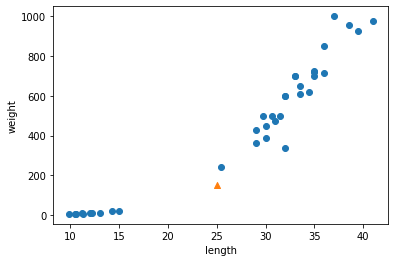

In [57]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')  #marker 매개변수는 모양을 지정한다.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

새로운 샘플은 marker 매개변수를 '^'로 지정하여 삼각형으로 나타냈다. 이렇게 하면 구분하기 더 쉽다. 이상하다. 이 샘플은 분명히 오른쪽 위로 뻗어 있는 다른 도미 데이터에 더 가깝다. 왜 이 모델은 왼쪽 아래에 낮게 깔린 빙어 데이터에 가깝다고 판단한 걸까?

- k-최근접 이웃은 주변의 샘플 중에서 다수인 클래스를 예측으로 사용한다. 이 샘플의 주변 샘플을 알아보자. KNeighborsClassifier 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아 주는 kneigbors() 메서드를 제공한다. 이 메서드는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환한다. KNeighborsClassifier 클래스의 이웃 개수인 n_neighbors의 기본값은 5이므로 5개의 이웃이 반환 된다.

In [58]:
distances, indexes = kn.kneighbors([[25, 150]])

이전 절에서 넘파이 배열 인덱싱을 배웠다. 여기에서도 동일한 방법을 사용할 수 있다. indexes 배열을 사용해 훈련 데이터 중에서 이웃 샘플을 따로 구분해 그려보겠다.

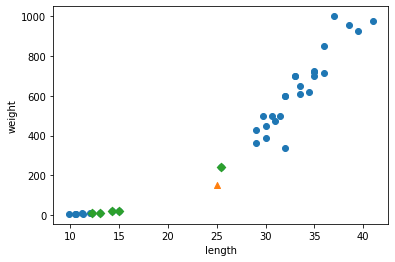

In [61]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

marker='D'로 지정하면 산점도를 마름모로 그린다. 삼각형 샘플에 가장 가까운 5개의 샘플이 초록 다이아몬드로 표시되었다. 역시 예측 결과와 마찬가지로 가장 가까운 이웃에 도미가 하나밖에 포함되지 않았다. 나머지 4개의 샘플은 모두 빙어이다. 직접 데이터를 확인해 보자.

In [62]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


확실히 가장 가까운 생선 4개는 빙어(0)인 것 같다. 타깃 데이터로 확인하면 더 명확하다.

In [63]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


길이가 25cm, 무게가 150g인 생선에 가장 가까운 이웃에는 빙어가 압도적으로 많다. 따라서 샘플의 클래스를 빙어로 예측하는 것은 무리가 아니다. 왜 가장 가까운 이웃을 빙어라고 생각한 것일까? 산점도를 보면 직관적으로 도미와 가깝게 보이는데 말이다. 이 문제의 해결 실마리를 찾기 위해 kneighbors() 메서드에서 반환한 distances 배열을 출력해 보겠다. 이 배열에는 이웃 샘플까지의 거리가 담겨있다.

In [64]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


- 이상한 점을 눈치 챘나요?

### 기준을 맞춰라

산점도 그래프를 다시 살펴보자. x축은 범위가 좁고(10~40), y축은 범위가 넓다(0~1000). 따라서 y축으로 조금만 멀어져도 거리가 아주 큰 값으로 계산된다. 이 때문에 오른쪽 위의 도미 샘플이 이웃으로 선택되지 못했다. 이를 눈으로 명확히 확인하기 위해 x축의 범위를 동일하게 0~1,000으로 맞추어 보겠습니다. 맷플롯립에서 x축 범위를 지정하려면 xlim()함수를 사용한다. (비슷하게 y축 범위를 지정하려면 ylim()함수를 사용한다.)

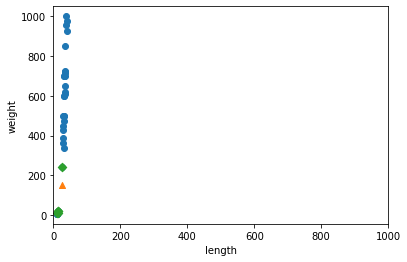

In [65]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

산점도가 거의 일직선으로 나타나는군요. x축과 y축의 범위를 동일하게 맞추었더니 모든 데이터가 수직으로 늘어선 형태가 되었다. 확실히 이런 데이터라면 생선의 길이 x축은 가장 가까운 이웃을 찾는 데 크게 영향을 미치지 못한다. 오로지 생선의 무게 y축만 고려 대상이 된다. 두 특성(무게,길이)의 값이 놓인 범위가 매우 다르다 이를 두 특성의 **스케일 scale** 이 다르다고도 말한다. 특성 간 스케일이 다른 일은 매우 흔하다. 어떤 사람이 방의 넓이를 재는데 세로는 cm로, 가로는 inch로 쟀다면 정사각형인 방도 직사각형처럼 보일 것이다. 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다. 알고리즘이 거리 기반 일 때 특히 그렇다. 여기에는 k-최근접 이웃도 포함된다. 이런 알고리즘들은 샘플 간의 거리에 영향을 많이 받으므로 제대로 사용하려면 특성값을 일정한 기준으로 맞춰 주어야 한다. 이런 작업을 **데이터 전처리**라고 부른다. 가장 널리 사용하는 전처리 방법 중 하나는 **표준점수 standard score**이다.(혹은 z 점수라고도 부른다.) 표준점수는 각 특성값이 0에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다. 이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있다. 계산하는 방법은 간단하다. 평균을 빼고 표준편차를 나누어 주면된다. 넘파이는 편리하게도 이 두 함수를 모두 제공한다.

In [66]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

np.mean() 함수는 평균을 계산하고, np.std() 함수는 표준편차를 계산한다. train_input은 (36,2) 크기의 배열이다. 특성마다 값의 스케일이 다르므로 평균과 표준편차는 각 특성별로 계산해야 한다. 이를 위해 axis=0으로 지정했다. 이렇게 하면 행을 따라 각 열의 통계 값을 계산한다.

In [67]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


각 특성마다 평균과 표준편차가 구해졌다. 이제 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수로 변환해보자.

In [68]:
train_scaled = (train_input - mean) / std

이 식은 어떻게 계산되는 걸까? 넘파이는 똑똑하게도 train_input의 모든 행에서 mean에 있는 두 평균값을 빼준다. 그 다음 std에 있는 두 표준편차를 다시 모든 행에 적용한다. 다음 그림을 보면 이해하기 쉽다. 이런 넘파이 기능을 **브로드캐스팅 broadcasting** 이라고 부른다.